## Importing Libraries

In [156]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Extraction

## 1.1. Initializing Crypto Data Lists and Creating DataFrame

In [22]:
crypto_date_list = []
crypto_name_list = []
crypto_symbol_list = []
crypto_market_cap_list = []
crypto_price_list = []
crypto_circulating_supply_list = []
crypto_voulume_24hr_list = []
crypto_pct_1hr_list = []
crypto_pct_24hr_list = []
crypto_pct_7day_list = []

df = pd.DataFrame()

## 1.2. Scraping Date List from CoinMarketCap

In [23]:
scrape_date_list = []

def scrape_date():
    url = 'https://coinmarketcap.com/historical/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    a_tags = soup.find_all('a', class_='historical-link cmc-link')
    for tag in a_tags:
        href = tag.get('href')
        scrape_date_list.append(href)

scrape_date()
print('There are ' + str(len(scrape_date_list)) + ' dates(Sundays) available for scraping from CoinMarketCap historical data.')

There are 579 dates(Sundays) available for scraping from CoinMarketCap historical data.


## 1.3. Scraping Cryptocurrency Data for a Specific Date

In [24]:
def scrape_data(date):
    url = 'https://coinmarketcap.com' + date
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    tr = soup.find_all('tr', attrs={'class': 'cmc-table-row'})
    count = 0
    for row in tr:
        if count == 10:
            break
        count += 1

        try:
            crypto_date = date
        except AttributeError:
            crypto_date = None

        try:
            name_column = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sticky cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__name'})
            crypto_name = name_column.find('a', attrs={'class': 'cmc-table__column-name--name cmc-link'}).text.strip()
        except AttributeError:
            crypto_name = None

        try:
            crypto_symbol = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__symbol'}).text.strip()
        except AttributeError:
            crypto_symbol = None

        try:
            crypto_market_cap = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__market-cap'}).text.strip()
        except AttributeError:
            crypto_market_cap = None

        try:
            crypto_price = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__price'}).text.strip()
        except AttributeError:
            crypto_price = None

        try:
            crypto_circulating_supply = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__circulating-supply'}).text.strip().split(' ')[0]
        except AttributeError:
            crypto_circulating_supply = None

        try:
            crypto_voulume_24hr_td = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__volume-24-h'})
            crypto_voulume_24hr = crypto_voulume_24hr_td.find('a', attrs={'class': 'cmc-link'}).text.strip()
        except AttributeError:
            crypto_voulume_24hr = None

        try:
            crypto_pct_1hr = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-1-h'}).text.strip()
        except AttributeError:
            crypto_pct_1hr = None

        try:
            crypto_pct_24hr = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-24-h'}).text.strip()
        except AttributeError:
            crypto_pct_24hr = None

        try:
            crypto_pct_7day = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__percent-change-7-d'}).text.strip()
        except AttributeError:
            crypto_pct_7day = None

        crypto_date_list.append(crypto_date)
        crypto_name_list.append(crypto_name)
        crypto_symbol_list.append(crypto_symbol)
        crypto_market_cap_list.append(crypto_market_cap)
        crypto_price_list.append(crypto_price)
        crypto_circulating_supply_list.append(crypto_circulating_supply)
        crypto_voulume_24hr_list.append(crypto_voulume_24hr)
        crypto_pct_1hr_list.append(crypto_pct_1hr)
        crypto_pct_24hr_list.append(crypto_pct_24hr)
        crypto_pct_7day_list.append(crypto_pct_7day)

## 1.4. Scraping Cryptocurrency Data for Multiple Dates historically in order (beginning from initiation of Bitcoin in 2013 and all ALT coins that followed upto the current date)

In [25]:
from datetime import datetime

date_format = "%Y%m%d"

# Split and convert the start date and end date
start_date = datetime.strptime(scrape_date_list[0].split('/')[-2], date_format).strftime('%Y-%m-%d')
end_date = datetime.strptime(scrape_date_list[-1].split('/')[-2], date_format).strftime('%Y-%m-%d')
print('There are ' + str(len(scrape_date_list)) + ' dates(Sundays) between ' + start_date + ' and ' + end_date)


for i in range(len(scrape_date_list)):
    scrape_data(scrape_date_list[i])
    print("completed: " + str(i+1) + " out of " + str(len(scrape_date_list)))

There are 579 dates(Sundays) between 2013-04-28 and 2024-05-26
completed: 1 out of 579
completed: 2 out of 579
completed: 3 out of 579
completed: 4 out of 579
completed: 5 out of 579
completed: 6 out of 579
completed: 7 out of 579
completed: 8 out of 579
completed: 9 out of 579
completed: 10 out of 579
completed: 11 out of 579
completed: 12 out of 579
completed: 13 out of 579
completed: 14 out of 579
completed: 15 out of 579
completed: 16 out of 579
completed: 17 out of 579
completed: 18 out of 579
completed: 19 out of 579
completed: 20 out of 579
completed: 21 out of 579
completed: 22 out of 579
completed: 23 out of 579
completed: 24 out of 579
completed: 25 out of 579
completed: 26 out of 579
completed: 27 out of 579
completed: 28 out of 579
completed: 29 out of 579
completed: 30 out of 579
completed: 31 out of 579
completed: 32 out of 579
completed: 33 out of 579
completed: 34 out of 579
completed: 35 out of 579
completed: 36 out of 579
completed: 37 out of 579
completed: 38 out of 

In [29]:
df['Date'] = crypto_date_list
df['Name'] = crypto_name_list
df['Symbol'] = crypto_symbol_list
df['Market Cap'] = crypto_market_cap_list
df['Price'] = crypto_price_list
df['Circulating Supply'] = crypto_circulating_supply_list
df['Volume (24hr)'] = crypto_voulume_24hr_list
df['% 1h'] = crypto_pct_1hr_list
df['% 24h'] = crypto_pct_24hr_list
df['% 7d'] = crypto_pct_7day_list

df

,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,/historical/20130428/,Bitcoin,BTC,"$1,488,566,971.96",$134.21,"11,091,325",None,0.64%,--,--
1,/historical/20130428/,Litecoin,LTC,"$74,637,021.57",$4.3484,"17,164,230",None,0.80%,--,--
2,/historical/20130428/,Peercoin,PPC,"$7,250,186.65",$0.3865,"18,757,362",None,-0.93%,--,--
3,/historical/20130428/,Namecoin,NMC,"$5,995,997.19",$1.1072,"5,415,300",None,-0.05%,--,--
4,/historical/20130428/,Terracoin,TRC,"$1,503,099.40",$0.6469,"2,323,570",None,0.61%,--,--
...,...,...,...,...,...,...,...,...,...,...
5782,/historical/20240526/,USDC,USDC,"$32,642,748,424.99",$0.9999,"32,644,272,748","$4,006,530,901.71",0.00%,<0.01%,<0.01%
5783,/historical/20240526/,XRP,XRP,"$29,279,012,242.07",$0.5282,"55,430,475,754","$579,619,778.84",-0.26%,-2.51%,3.64%
5784,/historical/20240526/,Dogecoin,DOGE,"$24,011,204,054.08",$0.1662,"144,454,446,384","$1,359,410,362.15",-0.43%,-4.45%,11.48%
5785,/historical/20240526/,Toncoin,TON,"$21,920,336,789.34",$6.3086,"3,474,700,934","$108,700,712.57",-0.59%,-1.08%,0.75%


### DataFrame Information 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787 entries, 0 to 5786
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                5787 non-null   object
 1   Name                5787 non-null   object
 2   Symbol              5787 non-null   object
 3   Market Cap          5787 non-null   object
 4   Price               5787 non-null   object
 5   Circulating Supply  5787 non-null   object
 6   Volume (24hr)       5440 non-null   object
 7   % 1h                5787 non-null   object
 8   % 24h               5787 non-null   object
 9   % 7d                5787 non-null   object
dtypes: object(10)
memory usage: 452.2+ KB


# 2. Data Cleaning and Formatting

In [31]:
# Extract the date component from the 'Date' column and convert it to a datetime data type
df['Date'] = pd.to_datetime(df['Date'].str.split('/').str[-2], format='%Y%m%d')

# Replace the dollar signs ($) and commas (,) from the 'Market Cap' and 'Price' columns
df['Market Cap'] = df['Market Cap'].str.replace('[$,]', '', regex=True)
df['Price'] = df['Price'].str.replace('[$,]', '', regex=True)

# Replace the commas (,) from the 'Circulating Supply' column
df['Circulating Supply'] = df['Circulating Supply'].str.replace(',', '')

# Replace the dollar signs ($) and commas (,) from the 'Volume (24hr)' columns
df['Volume (24hr)'] = df['Volume (24hr)'].str.replace('[$,]', '', regex=True)

# Replace the unchange sign (--), the smaller sign (<), the larger sign (>) and percentage sign (%) from the '% 1h', '% 24h', and '% 7d' columns
df['% 1h'] = df['% 1h'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')
df['% 24h'] = df['% 24h'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')
df['% 7d'] = df['% 7d'].str.replace('--', '0').str.lstrip('>').str.lstrip('<').str.rstrip('%')

# Convert the numeric columns to appropriate data types, replacing invalid values with NaN
numeric_cols = ['Market Cap', 'Price', 'Circulating Supply', 'Volume (24hr)', '% 1h', '% 24h', '% 7d']
df[numeric_cols] = df[numeric_cols].apply(lambda x: pd.to_numeric(x))

# Handle specific case of "<0.01" by replacing it with a small non-zero value, e.g., 0.005
df.loc[df['% 1h'] < 0, '% 1h'] = 0.005

# Set the display format for float and integer values
pd.options.display.float_format = '{:.2f}'.format

# Display the updated DataFrame
df


,Date,Name,Symbol,Market Cap,Price,Circulating Supply,Volume (24hr),% 1h,% 24h,% 7d
0,2013-04-28,Bitcoin,BTC,1488566971.96,134.21,11091325,NaN,0.64,0.00,0.00
1,2013-04-28,Litecoin,LTC,74637021.57,4.35,17164230,NaN,0.80,0.00,0.00
2,2013-04-28,Peercoin,PPC,7250186.65,0.39,18757362,NaN,0.01,0.00,0.00
3,2013-04-28,Namecoin,NMC,5995997.19,1.11,5415300,NaN,0.01,0.00,0.00
4,2013-04-28,Terracoin,TRC,1503099.40,0.65,2323570,NaN,0.61,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
5782,2024-05-26,USDC,USDC,32642748424.99,1.00,32644272748,4006530901.71,0.00,0.01,0.01
5783,2024-05-26,XRP,XRP,29279012242.07,0.53,55430475754,579619778.84,0.01,-2.51,3.64
5784,2024-05-26,Dogecoin,DOGE,24011204054.08,0.17,144454446384,1359410362.15,0.01,-4.45,11.48
5785,2024-05-26,Toncoin,TON,21920336789.34,6.31,3474700934,108700712.57,0.01,-1.08,0.75


# 3. Saving as .CSV file 

In [42]:
# Save the DataFrame as a CSV file
# Note: this is a historical data set of crypto currencies based on their dates
df.to_csv('output.csv', index=False)

# 4. Scraping chart of CURRENT top 10 Crypto Currencies 

In [146]:
chart_url = 'https://www.cryptocurrencychart.com/top/10'
page=requests.get(chart_url)
chart_soup= BeautifulSoup(page.text, 'html')

In [147]:
wtitles = chart_soup.find_all('th')
header= [title.text.strip() for title in wtitles]
header

['#',
 'Name',
 'Price',
 'Price chart (14d)',
 'Change',
 'Supply',
 'Trade volume',
 'Trade activity',
 'Market capitalization',
 'My coins',
 'My value']

In [148]:
df2 = pd.DataFrame(columns=header)
df2

,#,Name,Price,Price chart (14d),Change,Supply,Trade volume,Trade activity,Market capitalization,My coins,My value


In [149]:
tabledata = chart_soup.find_all('tr')

for row in tabledata[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    ##print(individual_row_data)

    length = len(df2)
    df2.loc[length] = individual_row_data
df2    

,#,Name,Price,Price chart (14d),Change,Supply,Trade volume,Trade activity,Market capitalization,My coins,My value
0,1,Bitcoin (BTC),"$68,842.93","{0,47,44,61,61,56,89,100,92,72,80,86,84,85}",+0.06%,"19,704,103","$192,467,300",1.00 %,"$1,357,415,203,681",,
1,2,Ethereum (ETH),"$3,924.09","{0,10,5,18,21,18,58,85,83,86,80,81,91,100}",+2.16%,"120,134,874","$214,601,237",2.60 %,"$468,492,414,164",,
2,3,Tether (USDT),$1.00,"{52,0,77,62,72,61,77,48,67,87,70,100,53,60}",+0.02%,"111,937,360,453","$292,842,312",13.41 %,"$111,925,071,714",,
3,4,Binance Coin (BNB),$605.27,"{0,16,3,18,13,16,27,90,100,63,58,72,70,71}",+0.05%,"147,585,708","$4,986,893",0.28 %,"$89,253,371,243",,
4,5,Solana (SOL),$165.69,"{0,28,40,63,74,68,100,88,89,79,61,65,51,56}",+1.22%,"449,402,918","$66,168,799",4.40 %,"$74,305,255,518",,
5,6,USD Coin (USDC),$0.99,"{88,56,74,82,52,14,39,76,89,100,85,58,87,0}",-1.15%,"32,644,330,503","$31,675,683",4.90 %,"$32,114,023,964",,
6,7,XRP (XRP),$0.53,"{0,26,31,50,43,22,56,78,64,52,68,100,71,65}",-0.49%,"55,430,475,754","$8,655,678",1.51 %,"$29,476,336,368",,
7,8,Dogecoin (DOGE),$0.17,"{0,32,19,37,29,14,53,88,85,53,69,100,88,81}",-1.07%,"144,452,826,384","$21,843,594",5.62 %,"$24,200,706,722",,
8,9,Cardano (ADA),$0.46,"{0,32,44,80,80,62,92,100,87,55,47,62,48,51}",+0.36%,"35,689,168,054","$3,298,071",1.50 %,"$16,497,740,845",,
9,10,Avalanche (AVAX),$37.17,"{0,28,30,52,59,46,77,100,90,72,68,69,57,60}",+0.77%,"392,904,205","$3,106,174",1.37 %,"$14,569,052,667",,


In [150]:
df2.drop([10],inplace = True)

### TOP 10 Crytpto Currencies by Market Cap

In [151]:
df2.filter(items=['Name','Price','Supply', 'Trade volume'])

,Name,Price,Supply,Trade volume
0,Bitcoin (BTC),"$68,842.93","19,704,103","$192,467,300"
1,Ethereum (ETH),"$3,924.09","120,134,874","$214,601,237"
2,Tether (USDT),$1.00,"111,937,360,453","$292,842,312"
3,Binance Coin (BNB),$605.27,"147,585,708","$4,986,893"
4,Solana (SOL),$165.69,"449,402,918","$66,168,799"
5,USD Coin (USDC),$0.99,"32,644,330,503","$31,675,683"
6,XRP (XRP),$0.53,"55,430,475,754","$8,655,678"
7,Dogecoin (DOGE),$0.17,"144,452,826,384","$21,843,594"
8,Cardano (ADA),$0.46,"35,689,168,054","$3,298,071"
9,Avalanche (AVAX),$37.17,"392,904,205","$3,106,174"


In [152]:
df2[["Name","Symbol"]] = df2["Name"].str.split('(',n=1, expand= True)
df2['Symbol']=df['Symbol'].str.strip(')')

In [153]:
df3 = df2.filter(items=['Name','Symbol'])

# 5. Generating Graphs of Trends of selected Crypto Currency

In [157]:
df = pd.read_csv('output.csv')

## 5.1. Defining function for the histroic trends generation of desired Crypto

In [177]:
def trends_generator():

    # Convert 'Date' to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter data for x
    crypto_data = df[df['Symbol'] == x]

    # Set the style of the axes and the text color
    plt.rcParams['axes.edgecolor']='#333F4B'
    plt.rcParams['axes.linewidth']=0.8
    plt.rcParams['xtick.color']='#333F4B'
    plt.rcParams['ytick.color']='#333F4B'
    plt.rcParams['text.color']='#333F4B'



    # Create subplots
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))

    # Plot 'Price' over time
    axs[0].plot(crypto_data['Date'], crypto_data['Price'], color='#007acc', alpha=0.7)
    axs[0].set_title( x + ' Price Over Time', fontsize=15, fontweight='black', color = '#333F4B')
    

    # Plot 'Market Cap' over time
    axs[1].plot(crypto_data['Date'], crypto_data['Market Cap'], color='#007acc', alpha=0.7)
    axs[1].set_title( x + ' Market Cap Over Time', fontsize=15, fontweight='black', color = '#333F4B')
    

    # Plot 'Volume (24hr)' over time
    axs[2].plot(crypto_data['Date'], crypto_data['Volume (24hr)'], color='#007acc', alpha=0.7)
    axs[2].set_title( x + ' 24hr Trading Volume Over Time', fontsize=15, fontweight='black', color = '#333F4B')
    

    # Formatting dates
    date_format = mdates.DateFormatter('%Y')
    for ax in axs:
        ax.xaxis.set_major_formatter(date_format)
        ax.xaxis.set_major_locator(mdates.YearLocator())
    
    plt.tight_layout()
    plt.show()


## 5.2. input x as the symbol of choice for historic trend generation

In [182]:
df3

,Name,Symbol
0,Bitcoin,BTC
1,Ethereum,LTC
2,Tether,PPC
3,Binance Coin,NMC
4,Solana,TRC
5,USD Coin,DVC
6,XRP,NVC
7,Dogecoin,BTC
8,Cardano,LTC
9,Avalanche,NMC


#### Prompt: Select your choice from list of the top 10 crypto currencies you wish to generate the performance analysis trend of... (input symbol)


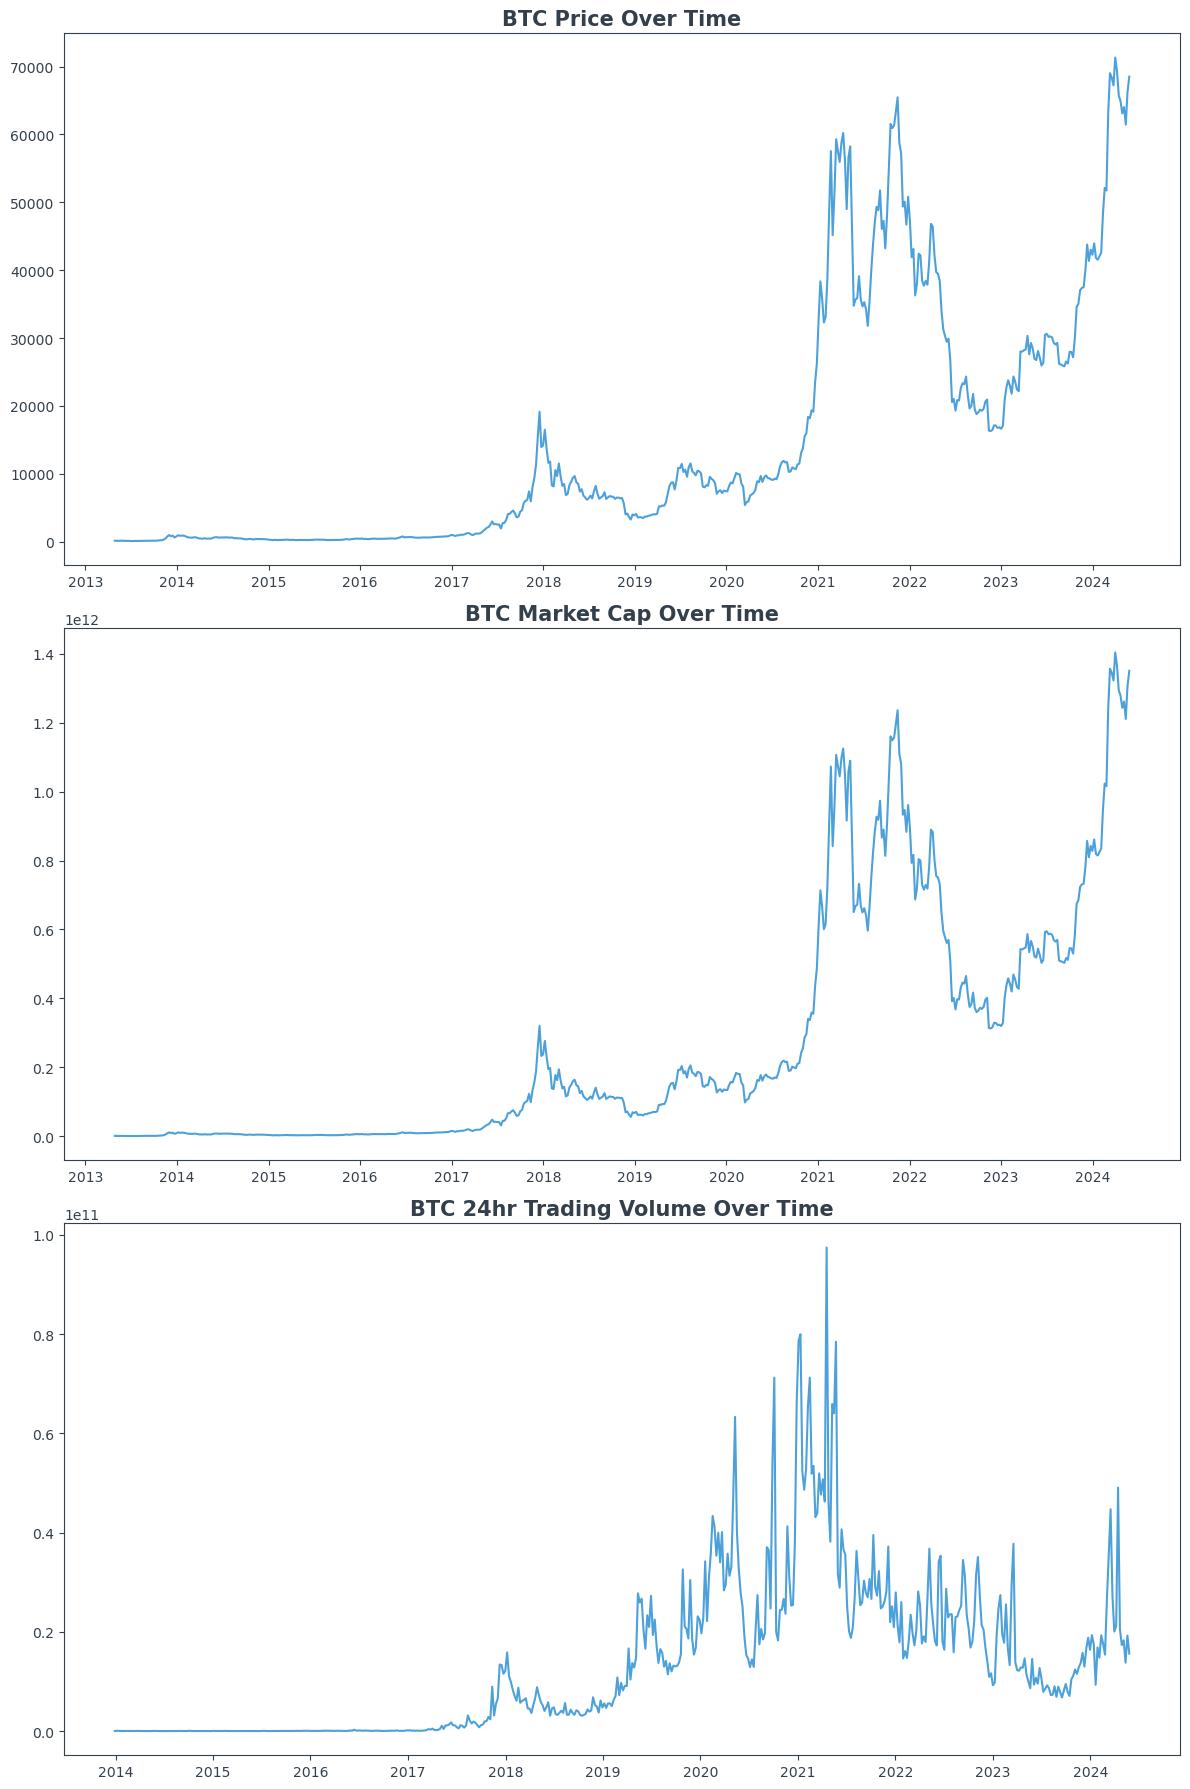

In [178]:
x = 'BTC'
trends_generator()

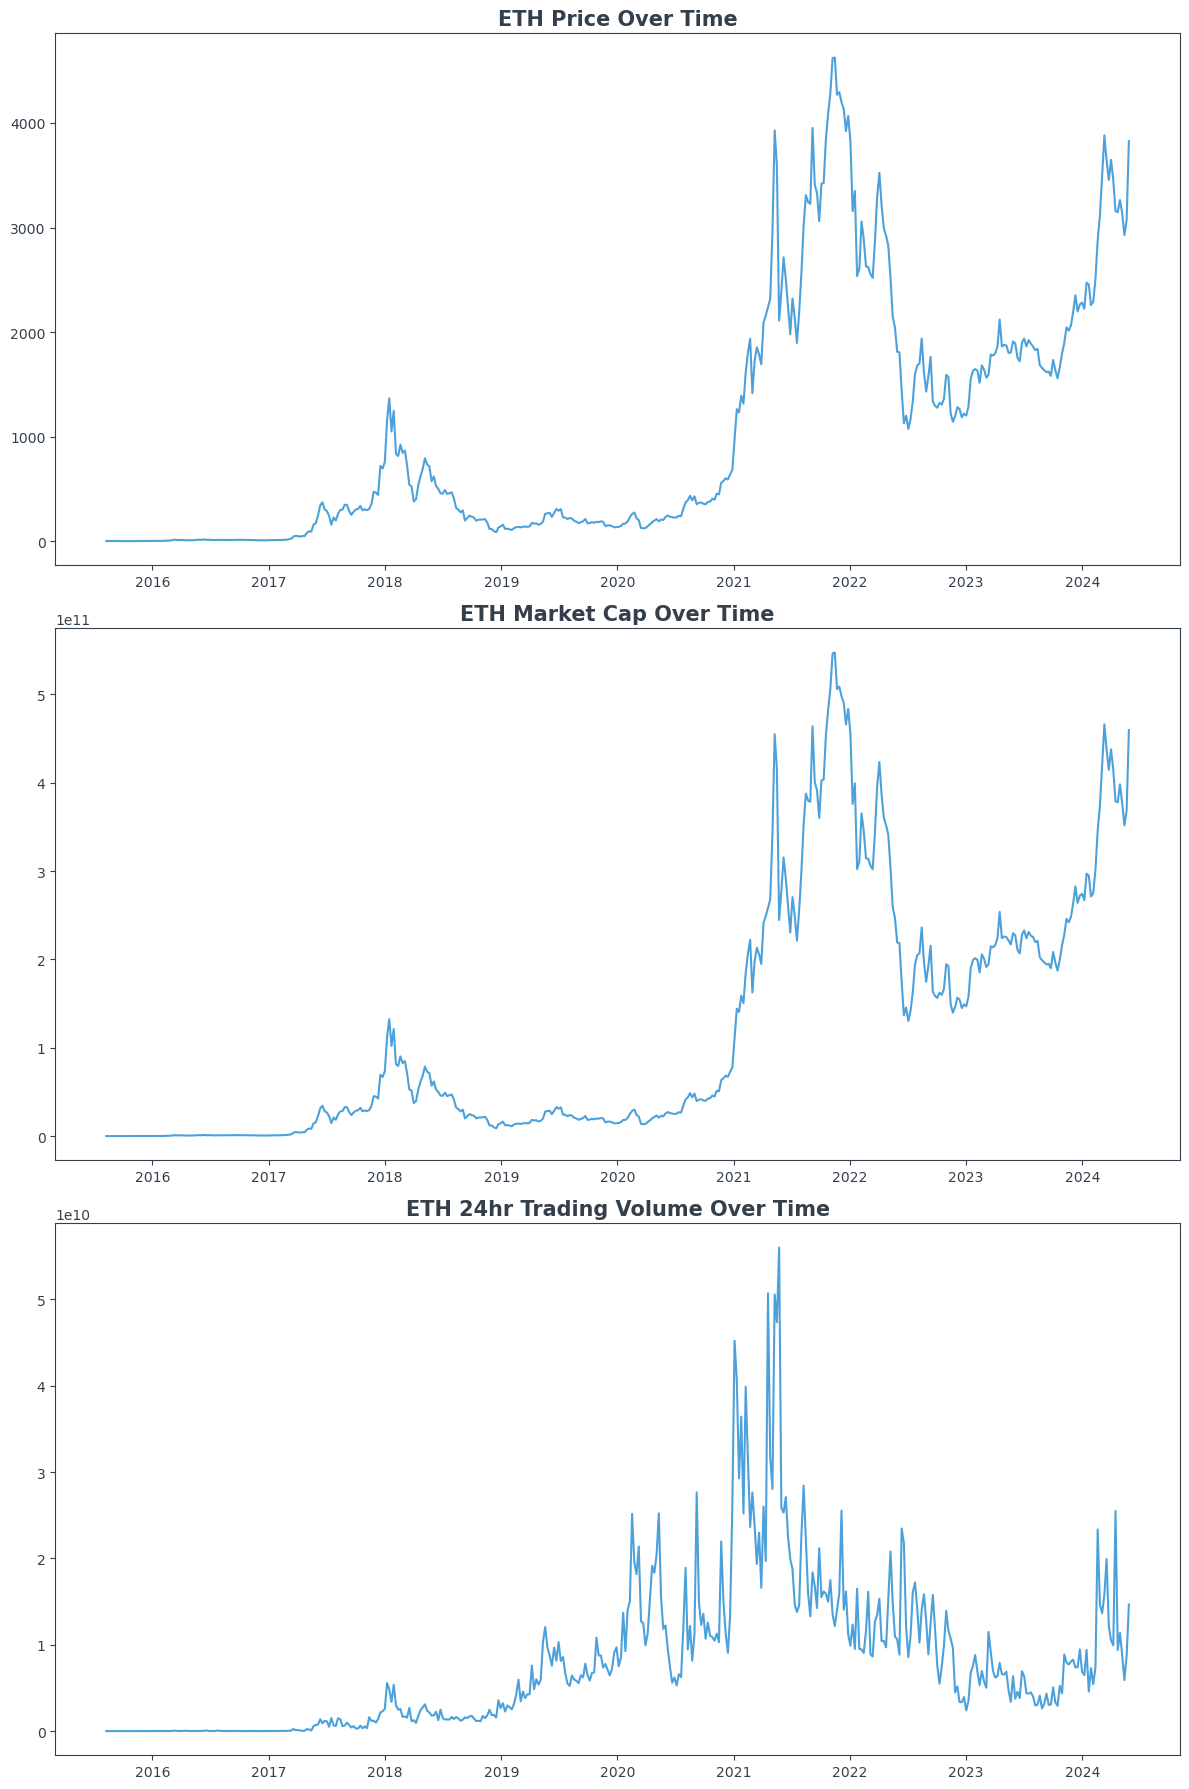

In [179]:
x = 'ETH'
trends_generator()

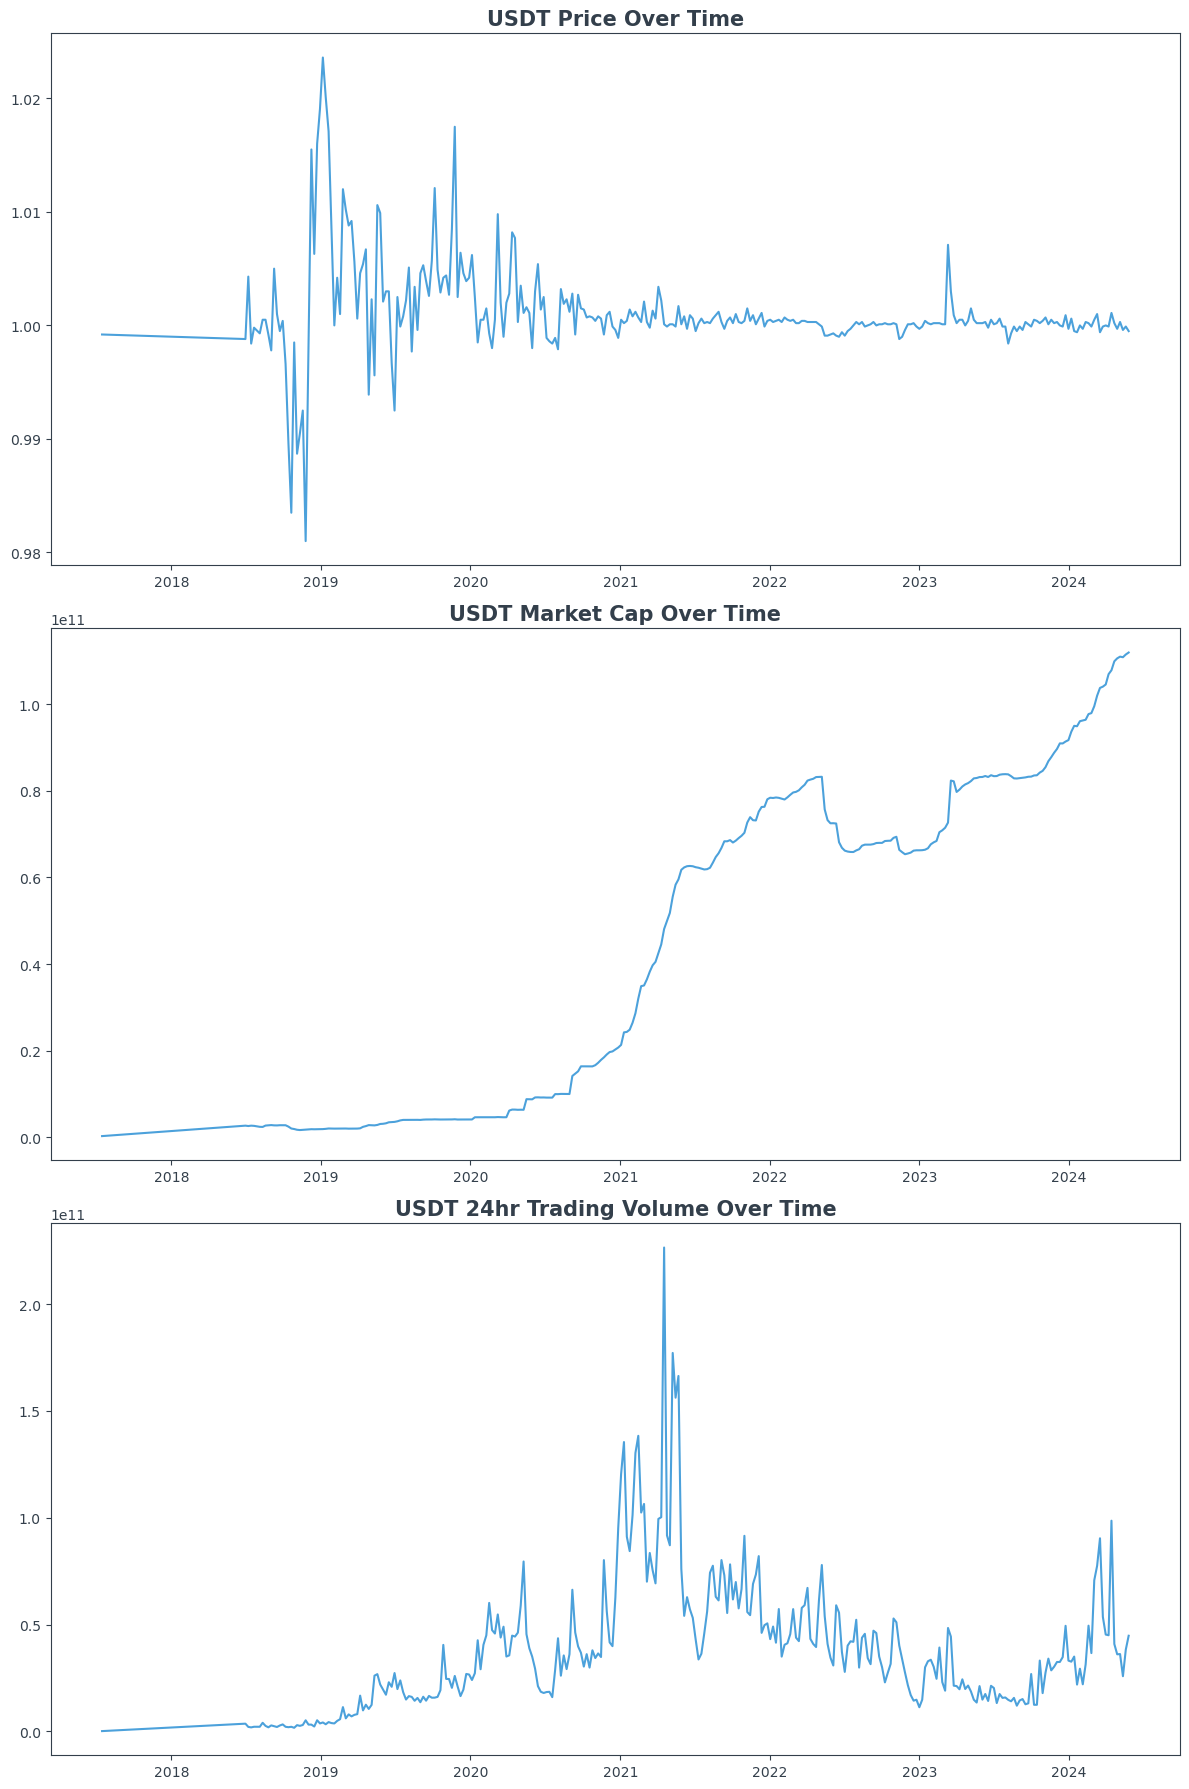

In [180]:
x = 'USDT'
trends_generator()

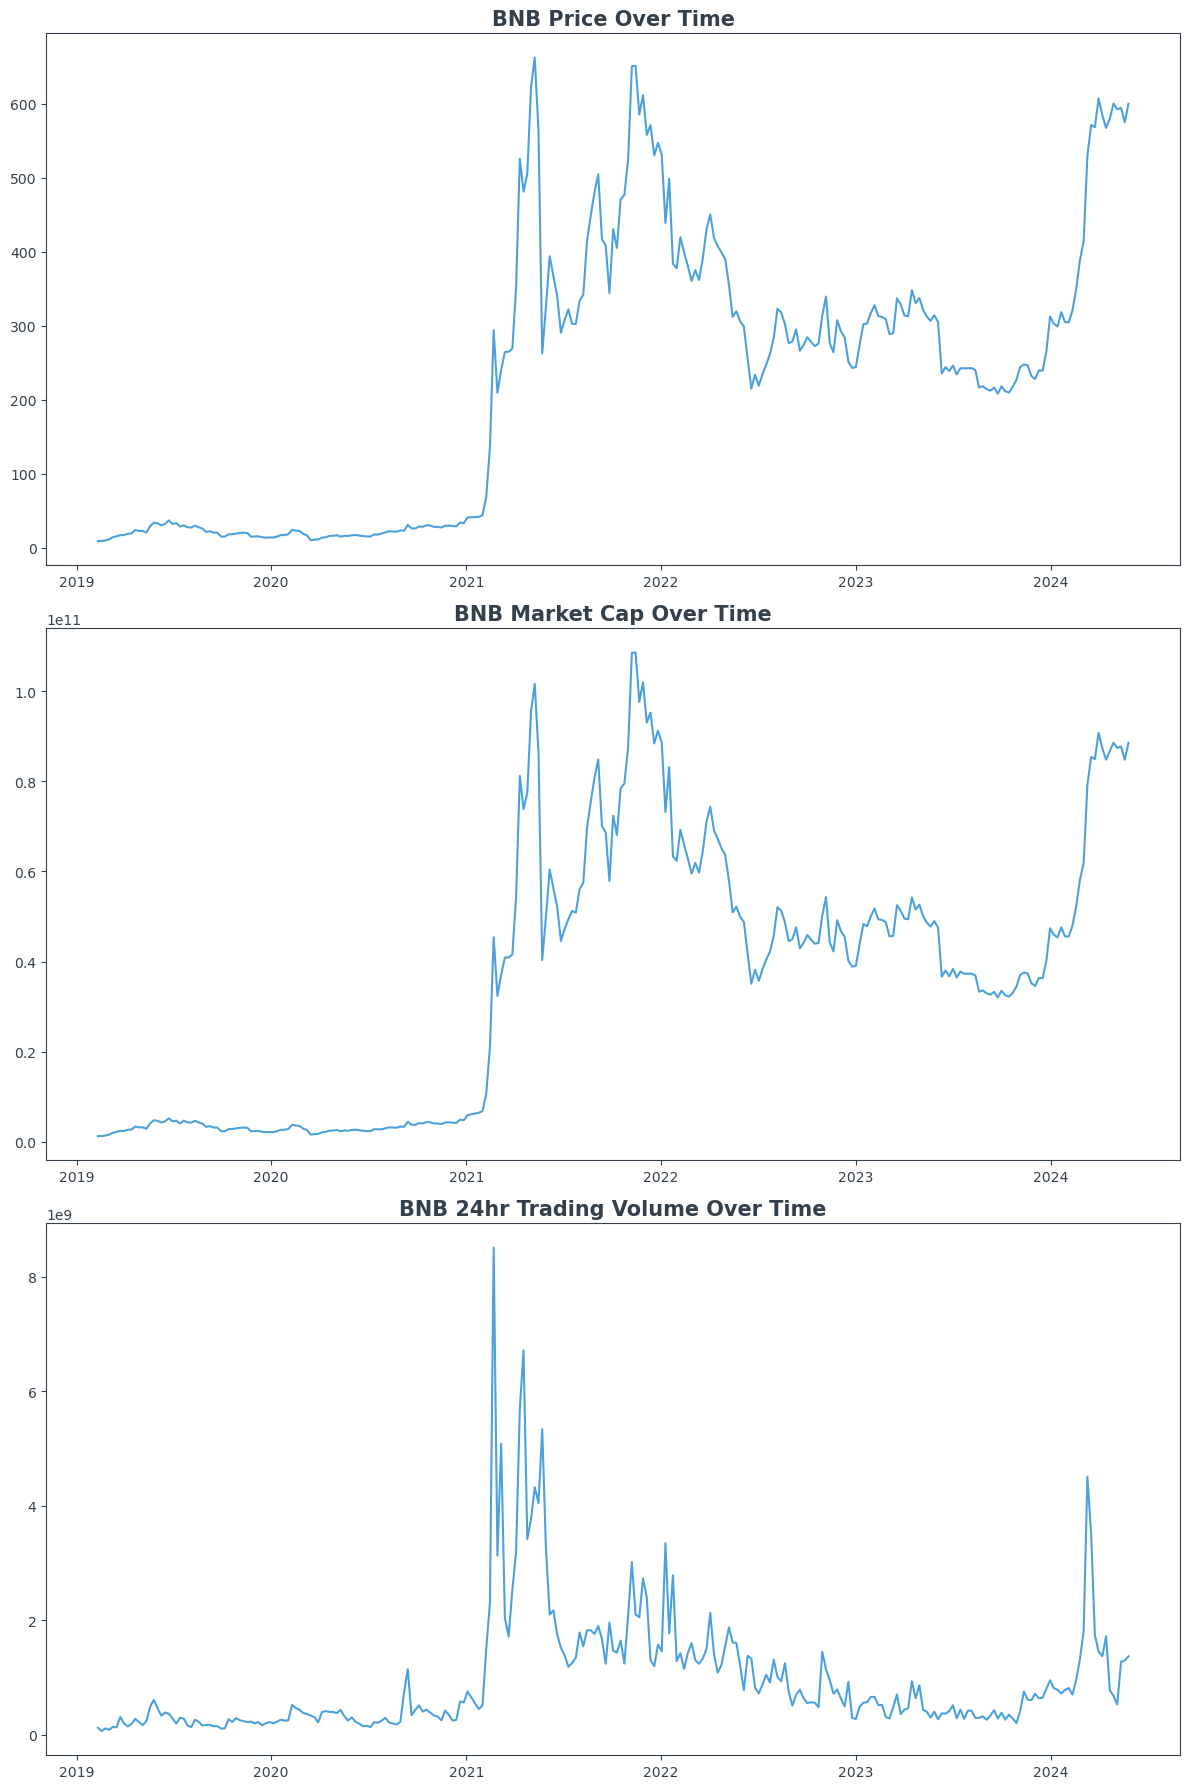

In [181]:
x = 'BNB'
trends_generator()

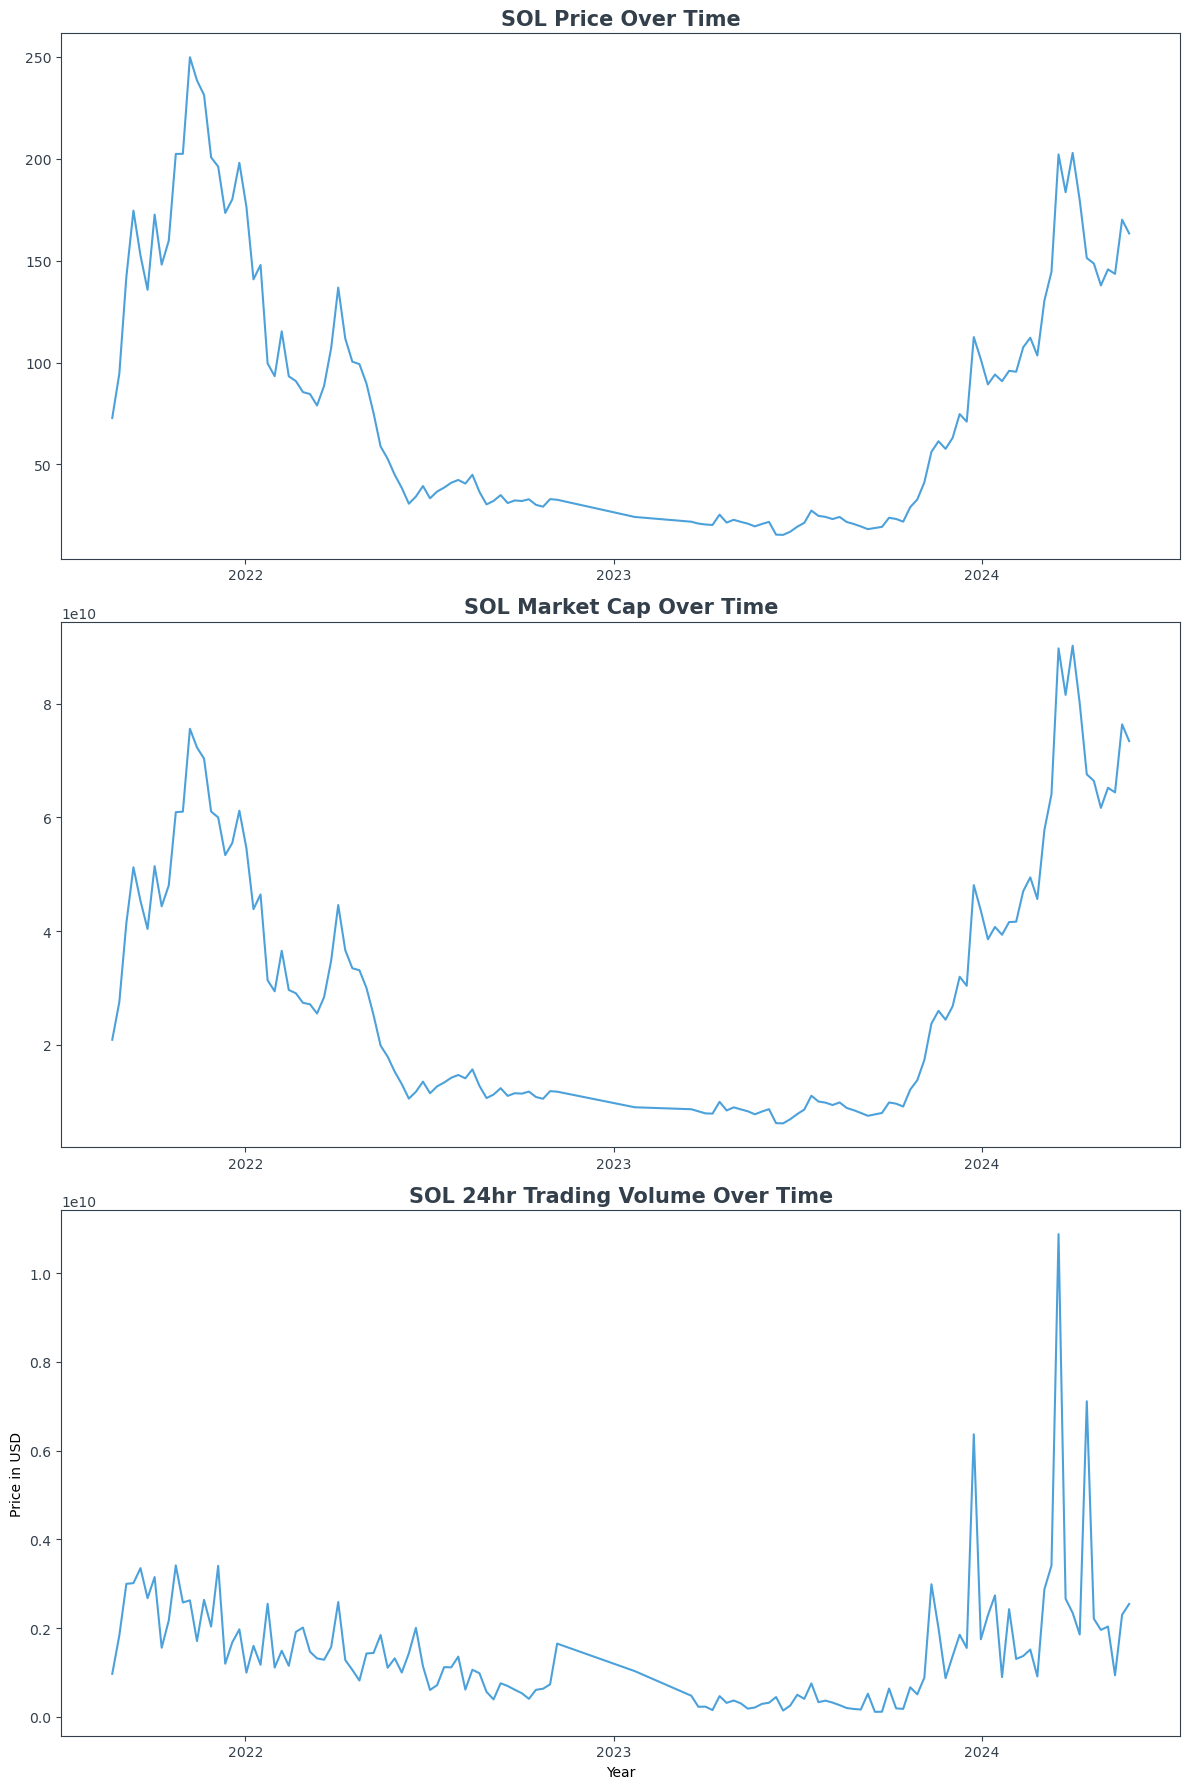

In [174]:
x = 'SOL'
trends_generator()